## Step 1: Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

## Step 2: Loading Data into DataFrame

In [2]:
Dataframe = pd.read_csv('99acres.csv')

In [3]:
Dataframe.drop(columns='Unnamed: 0', inplace=True)

In [4]:
Dataframe.head()

,Title,Location,Address,Area Type,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Availability,Images
0,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",Carpet Area,"33,000",515,2,2,0.0,19.215537,72.962710,Ready To Move,['https://static.99acres.com/universalapp/img/...
1,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",Carpet Area,"25,000",771,2,2,4.2,19.294529,72.889927,Ready To Move,['https://static.99acres.com/universalapp/img/...
2,Hiranandani Castle Rock,2 BHK Flat for rent in Hiranandani Gardens Pow...,"Hiranandani Gardens Powai, Mumbai",Super Built-up Area,1.1 Lac,"1,350",2,2,0.0,19.114405,72.911050,Ready To Move,['https://static.99acres.com/universalapp/img/...
3,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",Carpet Area,"30,000","1,120",3,2,0.0,28.503846,77.183032,Ready To Move,['https://static.99acres.com/universalapp/img/...
4,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,Super Built-up Area,"16,000","1,115",3,2,0.0,28.467073,77.513765,Ready To Move,['https://static.99acres.com/universalapp/img/...


In [5]:
# Creating a Working Copy of the Dataset
df = Dataframe.copy()

In [6]:
df.head()

,Title,Location,Address,Area Type,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Availability,Images
0,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",Carpet Area,"33,000",515,2,2,0.0,19.215537,72.962710,Ready To Move,['https://static.99acres.com/universalapp/img/...
1,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",Carpet Area,"25,000",771,2,2,4.2,19.294529,72.889927,Ready To Move,['https://static.99acres.com/universalapp/img/...
2,Hiranandani Castle Rock,2 BHK Flat for rent in Hiranandani Gardens Pow...,"Hiranandani Gardens Powai, Mumbai",Super Built-up Area,1.1 Lac,"1,350",2,2,0.0,19.114405,72.911050,Ready To Move,['https://static.99acres.com/universalapp/img/...
3,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",Carpet Area,"30,000","1,120",3,2,0.0,28.503846,77.183032,Ready To Move,['https://static.99acres.com/universalapp/img/...
4,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,Super Built-up Area,"16,000","1,115",3,2,0.0,28.467073,77.513765,Ready To Move,['https://static.99acres.com/universalapp/img/...


In [7]:
# Filter data within the geographic bounds of India
min_lat, max_lat = 8.066, 37.100
min_lon, max_lon = 68.116, 97.416

# Filter the DataFrame to keep only the rows within the specified range
df = df[(df['Latitude'] >= min_lat) & (df['Latitude'] <= max_lat) &
                 (df['Longitude'] >= min_lon) & (df['Longitude'] <= max_lon)]

In [8]:
# Convert price to numeric values
def convert_lac(price):
    if ' Lac' in price:
        price = price.replace(' Lac', '').strip()  # Remove ' Lac' and strip whitespace
        return float(price) * 100000  # Convert 'Lac' to 100,000
    else:
        return float(price.replace(',', '').strip())  # Remove commas and convert to float

# Applying the function to the 'Price' column
df.loc[:, 'Price'] = df['Price'].apply(convert_lac)
df = df[df['Price'] <= 100000]
df['Price'] = df['Price'].astype(float) 

#Print the modified 'Price' column
print(df['Price'])

0       33000.0
1       25000.0
3       30000.0
4       16000.0
5       60000.0
         ...   
2469    30000.0
2471    35000.0
2472    16000.0
2474    23000.0
2475    65000.0
Name: Price, Length: 1762, dtype: float64


In [9]:
# Remove commas from 'Total Sqft' column
df['Total Sqft'] = df['Total Sqft'].str.replace(',', '')

# Convert 'Total Sqft' column to numeric
df['Total Sqft'] = pd.to_numeric(df['Total Sqft'])

# Print the modified 'Total Sqft' column
print(df['Total Sqft'])

0        515
1        771
3       1120
4       1115
5       1745
        ... 
2469    1620
2471    1513
2472     435
2474     611
2475    2700
Name: Total Sqft, Length: 1762, dtype: int64


In [10]:
df

,Title,Location,Address,Area Type,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Availability,Images
0,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",Carpet Area,33000.0,515,2,2,0.0,19.215537,72.962710,Ready To Move,['https://static.99acres.com/universalapp/img/...
1,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",Carpet Area,25000.0,771,2,2,4.2,19.294529,72.889927,Ready To Move,['https://static.99acres.com/universalapp/img/...
3,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",Carpet Area,30000.0,1120,3,2,0.0,28.503846,77.183032,Ready To Move,['https://static.99acres.com/universalapp/img/...
4,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,Super Built-up Area,16000.0,1115,3,2,0.0,28.467073,77.513765,Ready To Move,['https://static.99acres.com/universalapp/img/...
5,Eldeco Utopia,3 BHK Flat for rent in Sector 93 A Noida,Sector 93 A Noida,Carpet Area,60000.0,1745,3,3,3.9,28.522951,77.386117,Ready To Move,['https://static.99acres.com/universalapp/img/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,Vatika India Next,3 BHK Independent Builder Floor for rent in Se...,Sector 82 Gurgaon,Carpet Area,30000.0,1620,3,3,4.1,28.393108,76.958876,Ready To Move,['https://static.99acres.com/universalapp/img/...
2471,Indosam75,3 BHK Flat for rent in Sector 75 Noida,Sector 75 Noida,Super Built-up Area,35000.0,1513,3,3,3.8,28.557736,77.323458,Ready To Move,['https://static.99acres.com/universalapp/img/...
2472,Paramount Golfforeste,Studio Apartments / 1 RK Flats for rent in Sec...,Sector ZETA Greater Noida,Carpet Area,16000.0,435,1,1,4.2,28.570633,77.327215,Ready To Move,['https://static.99acres.com/universalapp/img/...
2474,Suncity Avenue 76,2 BHK Flat for rent in Sector 76 Gurgaon,Sector 76 Gurgaon,Carpet Area,23000.0,611,2,2,0.0,28.391011,76.990024,Ready To Move,['https://static.99acres.com/universalapp/img/...


In [11]:
# Check for the duplicate data
df.duplicated().sum()

11

In [12]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
# Check for null values
df.isnull().sum()

Title           0
Location        0
Address         0
Area Type       0
Price           0
Total Sqft      0
Size            0
Bath            0
Rating          0
Latitude        0
Longitude       0
Availability    0
Images          0
dtype: int64

In [14]:
df.isna().sum()

Title           0
Location        0
Address         0
Area Type       0
Price           0
Total Sqft      0
Size            0
Bath            0
Rating          0
Latitude        0
Longitude       0
Availability    0
Images          0
dtype: int64

In [15]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1751 entries, 0 to 2475
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1751 non-null   object 
 1   Location      1751 non-null   object 
 2   Address       1751 non-null   object 
 3   Area Type     1751 non-null   object 
 4   Price         1751 non-null   float64
 5   Total Sqft    1751 non-null   int64  
 6   Size          1751 non-null   int64  
 7   Bath          1751 non-null   int64  
 8   Rating        1751 non-null   float64
 9   Latitude      1751 non-null   float64
 10  Longitude     1751 non-null   float64
 11  Availability  1751 non-null   object 
 12  Images        1751 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 191.5+ KB


<Axes: >

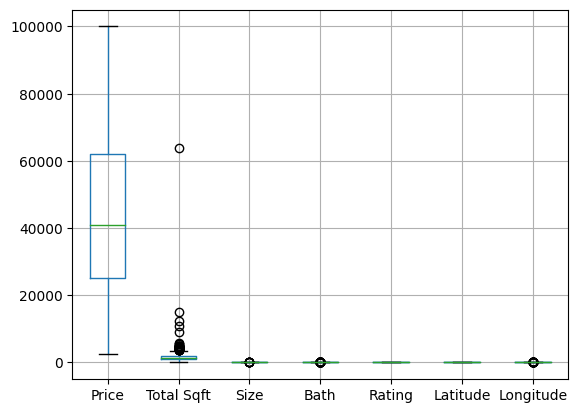

In [16]:
df.boxplot()

In [17]:
# Check for the shape of the data
df.shape

(1751, 13)

In [18]:
# Finding the IQR
percentile25 = df['Total Sqft'].quantile(0.25)
percentile75 = df['Total Sqft'].quantile(0.75)

In [19]:
iqr = percentile75 - percentile25

In [20]:
iqr

1045.5

In [21]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [22]:
df[df['Total Sqft'] < upper_limit]

,Title,Location,Address,Area Type,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Availability,Images
0,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",Carpet Area,33000.0,515,2,2,0.0,19.215537,72.962710,Ready To Move,['https://static.99acres.com/universalapp/img/...
1,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",Carpet Area,25000.0,771,2,2,4.2,19.294529,72.889927,Ready To Move,['https://static.99acres.com/universalapp/img/...
3,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",Carpet Area,30000.0,1120,3,2,0.0,28.503846,77.183032,Ready To Move,['https://static.99acres.com/universalapp/img/...
4,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,Super Built-up Area,16000.0,1115,3,2,0.0,28.467073,77.513765,Ready To Move,['https://static.99acres.com/universalapp/img/...
5,Eldeco Utopia,3 BHK Flat for rent in Sector 93 A Noida,Sector 93 A Noida,Carpet Area,60000.0,1745,3,3,3.9,28.522951,77.386117,Ready To Move,['https://static.99acres.com/universalapp/img/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,Vatika India Next,3 BHK Independent Builder Floor for rent in Se...,Sector 82 Gurgaon,Carpet Area,30000.0,1620,3,3,4.1,28.393108,76.958876,Ready To Move,['https://static.99acres.com/universalapp/img/...
2471,Indosam75,3 BHK Flat for rent in Sector 75 Noida,Sector 75 Noida,Super Built-up Area,35000.0,1513,3,3,3.8,28.557736,77.323458,Ready To Move,['https://static.99acres.com/universalapp/img/...
2472,Paramount Golfforeste,Studio Apartments / 1 RK Flats for rent in Sec...,Sector ZETA Greater Noida,Carpet Area,16000.0,435,1,1,4.2,28.570633,77.327215,Ready To Move,['https://static.99acres.com/universalapp/img/...
2474,Suncity Avenue 76,2 BHK Flat for rent in Sector 76 Gurgaon,Sector 76 Gurgaon,Carpet Area,23000.0,611,2,2,0.0,28.391011,76.990024,Ready To Move,['https://static.99acres.com/universalapp/img/...


In [23]:
df.shape

(1751, 13)

In [24]:
df.isnull().sum()

Title           0
Location        0
Address         0
Area Type       0
Price           0
Total Sqft      0
Size            0
Bath            0
Rating          0
Latitude        0
Longitude       0
Availability    0
Images          0
dtype: int64

In [25]:
df.sample(7)

,Title,Location,Address,Area Type,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Availability,Images
2041,"Tellapur, Hyderabad","4 Bedroom House for rent in Tellapur, Hyderabad","Tellapur, Hyderabad",Plot Area,90000.0,2448,4,4,0.0,17.453547,78.290540,Ready To Move,['https://static.99acres.com/universalapp/img/...
2351,SS The Leaf,4 BHK Flat for rent in Sector 85 Gurgaon,Sector 85 Gurgaon,Super Built-up Area,80000.0,3950,4,6,3.9,28.403652,76.953143,Ready To Move,['https://static.99acres.com/universalapp/img/...
2229,"Ashirwad Bhawan, Sati Joymati Nagar",2 BHK Independent Builder Floor for rent in Ma...,"Maligaon, Guwahati",Carpet Area,9000.0,650,2,1,0.0,26.160045,91.695809,Ready To Move,['https://static.99acres.com/universalapp/img/...
541,JAYPEE IB,3 BHK Flat for rent in Sector 129 Noida,Sector 129 Noida,Super Built-up Area,35000.0,1765,3,3,0.0,28.557736,77.323458,Ready To Move,['https://static.99acres.com/universalapp/img/...
765,Surana Tulsi Gaurav,"3 BHK Flat for rent in Ulwe, Navi Mumbai","Ulwe, Navi Mumbai",Carpet Area,28000.0,1200,3,3,0.0,18.976861,73.020131,Ready To Move,['https://static.99acres.com/universalapp/img/...
1675,DDA New Allotment,"3 BHK Flat for rent in Sector E Vasant Kunj, S...","Sector E Vasant Kunj, South Delhi",Super Built-up Area,53000.0,1480,3,2,3.9,28.627393,77.171695,Ready To Move,['https://static.99acres.com/universalapp/img/...
1816,Unitech South City 2,1 BHK Independent Builder Floor for rent in Se...,Sector 50 Gurgaon,Super Built-up Area,30000.0,1500,1,1,3.8,28.416654,77.061175,Ready To Move,['https://static.99acres.com/universalapp/img/...


In [26]:
df.shape

(1751, 13)

## Step 3:  Feature Engineering

In [27]:
# Function to extract city names from the address
def extract_city_name(address):
    # Split the address by comma
    parts = address.split(',')
    # Iterate through parts to find the city name
    for part in parts:
        # Check if the part contains either "Gurgaon" or "Noida"
        if "Gurgaon" in part:
            return "Gurgaon"
        elif "Bangalore" in part:
            return "Bangalore"
        elif "Noida" in part:
            return "Noida"
        elif "Faridabad" in part:
            return "Faridabad"
        elif "Mohali" in part:
            return "Mohali"
        elif "Parganas" in part:
            return "Parganas"
        elif "Panchkula" in part:
            return "Panchkula"
        elif "Chandigarh" in part:
            return "Chandigarh"
        elif "dharwad" in part:
            return "Dharwad"
    # If neither "Gurgaon" nor "Noida" is found, return the last part as city name
    return parts[-1].strip()


df['City'] = df['Address'].apply(extract_city_name)

In [28]:
df.shape

(1751, 14)

In [29]:
df

,Title,Location,Address,Area Type,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Availability,Images,City
0,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",Carpet Area,33000.0,515,2,2,0.0,19.215537,72.962710,Ready To Move,['https://static.99acres.com/universalapp/img/...,Thane
1,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",Carpet Area,25000.0,771,2,2,4.2,19.294529,72.889927,Ready To Move,['https://static.99acres.com/universalapp/img/...,Thane
3,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",Carpet Area,30000.0,1120,3,2,0.0,28.503846,77.183032,Ready To Move,['https://static.99acres.com/universalapp/img/...,South Delhi
4,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,Super Built-up Area,16000.0,1115,3,2,0.0,28.467073,77.513765,Ready To Move,['https://static.99acres.com/universalapp/img/...,Noida
5,Eldeco Utopia,3 BHK Flat for rent in Sector 93 A Noida,Sector 93 A Noida,Carpet Area,60000.0,1745,3,3,3.9,28.522951,77.386117,Ready To Move,['https://static.99acres.com/universalapp/img/...,Noida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,Vatika India Next,3 BHK Independent Builder Floor for rent in Se...,Sector 82 Gurgaon,Carpet Area,30000.0,1620,3,3,4.1,28.393108,76.958876,Ready To Move,['https://static.99acres.com/universalapp/img/...,Gurgaon
2471,Indosam75,3 BHK Flat for rent in Sector 75 Noida,Sector 75 Noida,Super Built-up Area,35000.0,1513,3,3,3.8,28.557736,77.323458,Ready To Move,['https://static.99acres.com/universalapp/img/...,Noida
2472,Paramount Golfforeste,Studio Apartments / 1 RK Flats for rent in Sec...,Sector ZETA Greater Noida,Carpet Area,16000.0,435,1,1,4.2,28.570633,77.327215,Ready To Move,['https://static.99acres.com/universalapp/img/...,Noida
2474,Suncity Avenue 76,2 BHK Flat for rent in Sector 76 Gurgaon,Sector 76 Gurgaon,Carpet Area,23000.0,611,2,2,0.0,28.391011,76.990024,Ready To Move,['https://static.99acres.com/universalapp/img/...,Gurgaon


In [30]:
df.reset_index(inplace=True)

In [31]:
df

,index,Title,Location,Address,Area Type,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Availability,Images,City
0,0,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",Carpet Area,33000.0,515,2,2,0.0,19.215537,72.962710,Ready To Move,['https://static.99acres.com/universalapp/img/...,Thane
1,1,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",Carpet Area,25000.0,771,2,2,4.2,19.294529,72.889927,Ready To Move,['https://static.99acres.com/universalapp/img/...,Thane
2,3,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",Carpet Area,30000.0,1120,3,2,0.0,28.503846,77.183032,Ready To Move,['https://static.99acres.com/universalapp/img/...,South Delhi
3,4,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,Super Built-up Area,16000.0,1115,3,2,0.0,28.467073,77.513765,Ready To Move,['https://static.99acres.com/universalapp/img/...,Noida
4,5,Eldeco Utopia,3 BHK Flat for rent in Sector 93 A Noida,Sector 93 A Noida,Carpet Area,60000.0,1745,3,3,3.9,28.522951,77.386117,Ready To Move,['https://static.99acres.com/universalapp/img/...,Noida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2469,Vatika India Next,3 BHK Independent Builder Floor for rent in Se...,Sector 82 Gurgaon,Carpet Area,30000.0,1620,3,3,4.1,28.393108,76.958876,Ready To Move,['https://static.99acres.com/universalapp/img/...,Gurgaon
1747,2471,Indosam75,3 BHK Flat for rent in Sector 75 Noida,Sector 75 Noida,Super Built-up Area,35000.0,1513,3,3,3.8,28.557736,77.323458,Ready To Move,['https://static.99acres.com/universalapp/img/...,Noida
1748,2472,Paramount Golfforeste,Studio Apartments / 1 RK Flats for rent in Sec...,Sector ZETA Greater Noida,Carpet Area,16000.0,435,1,1,4.2,28.570633,77.327215,Ready To Move,['https://static.99acres.com/universalapp/img/...,Noida
1749,2474,Suncity Avenue 76,2 BHK Flat for rent in Sector 76 Gurgaon,Sector 76 Gurgaon,Carpet Area,23000.0,611,2,2,0.0,28.391011,76.990024,Ready To Move,['https://static.99acres.com/universalapp/img/...,Gurgaon


In [32]:
df.to_csv('Rental_Data.csv', index=False)

# HOUSE RECOMMENDATION MODEL 

## Step 4: Data Visualization and Outlier Detection

In [33]:
df1 = pd.read_csv('Rental_Data.csv')
df1

,index,Title,Location,Address,Area Type,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Availability,Images,City
0,0,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",Carpet Area,33000.0,515,2,2,0.0,19.215537,72.962710,Ready To Move,['https://static.99acres.com/universalapp/img/...,Thane
1,1,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",Carpet Area,25000.0,771,2,2,4.2,19.294529,72.889927,Ready To Move,['https://static.99acres.com/universalapp/img/...,Thane
2,3,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",Carpet Area,30000.0,1120,3,2,0.0,28.503846,77.183032,Ready To Move,['https://static.99acres.com/universalapp/img/...,South Delhi
3,4,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,Super Built-up Area,16000.0,1115,3,2,0.0,28.467073,77.513765,Ready To Move,['https://static.99acres.com/universalapp/img/...,Noida
4,5,Eldeco Utopia,3 BHK Flat for rent in Sector 93 A Noida,Sector 93 A Noida,Carpet Area,60000.0,1745,3,3,3.9,28.522951,77.386117,Ready To Move,['https://static.99acres.com/universalapp/img/...,Noida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2469,Vatika India Next,3 BHK Independent Builder Floor for rent in Se...,Sector 82 Gurgaon,Carpet Area,30000.0,1620,3,3,4.1,28.393108,76.958876,Ready To Move,['https://static.99acres.com/universalapp/img/...,Gurgaon
1747,2471,Indosam75,3 BHK Flat for rent in Sector 75 Noida,Sector 75 Noida,Super Built-up Area,35000.0,1513,3,3,3.8,28.557736,77.323458,Ready To Move,['https://static.99acres.com/universalapp/img/...,Noida
1748,2472,Paramount Golfforeste,Studio Apartments / 1 RK Flats for rent in Sec...,Sector ZETA Greater Noida,Carpet Area,16000.0,435,1,1,4.2,28.570633,77.327215,Ready To Move,['https://static.99acres.com/universalapp/img/...,Noida
1749,2474,Suncity Avenue 76,2 BHK Flat for rent in Sector 76 Gurgaon,Sector 76 Gurgaon,Carpet Area,23000.0,611,2,2,0.0,28.391011,76.990024,Ready To Move,['https://static.99acres.com/universalapp/img/...,Gurgaon


In [34]:
df1.shape

(1751, 15)

In [35]:
df1.isnull().sum()

index           0
Title           0
Location        0
Address         0
Area Type       0
Price           0
Total Sqft      0
Size            0
Bath            0
Rating          0
Latitude        0
Longitude       0
Availability    0
Images          0
City            0
dtype: int64

In [36]:
df1.duplicated().sum()

0

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1751 non-null   int64  
 1   Title         1751 non-null   object 
 2   Location      1751 non-null   object 
 3   Address       1751 non-null   object 
 4   Area Type     1751 non-null   object 
 5   Price         1751 non-null   float64
 6   Total Sqft    1751 non-null   int64  
 7   Size          1751 non-null   int64  
 8   Bath          1751 non-null   int64  
 9   Rating        1751 non-null   float64
 10  Latitude      1751 non-null   float64
 11  Longitude     1751 non-null   float64
 12  Availability  1751 non-null   object 
 13  Images        1751 non-null   object 
 14  City          1751 non-null   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 205.3+ KB


In [38]:
df1.loc[:, 'Availability'] = (df1['Availability'] == 'Ready To Move')
df1.loc[:, 'Availability'].replace({True : 1, False : 0}, inplace=True)
df1.loc[:, 'Availability'] = df1['Availability'].astype(object)
df1['Availability'].sample(5)

274     1
1530    1
119     1
1466    1
26      1
Name: Availability, dtype: object

In [39]:
df1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
index,1751.0,1265.89,716.01,0.00,648.50,1284.00,1894.50,2475.00
Price,1751.0,45006.61,23231.32,2500.00,25000.00,41000.00,62000.00,100000.00
Total Sqft,1751.0,1596.71,1756.67,10.00,954.50,1433.00,2000.00,63722.00
Size,1751.0,2.58,0.84,1.00,2.00,3.00,3.00,8.00
Bath,1751.0,2.62,0.99,1.00,2.00,2.00,3.00,6.00
Rating,1751.0,1.55,1.95,0.00,0.00,0.00,3.90,4.50
Latitude,1751.0,24.34,5.57,8.47,19.14,28.40,28.48,32.25
Longitude,1751.0,76.48,2.60,72.39,73.94,77.05,77.32,91.80


#### Visualization

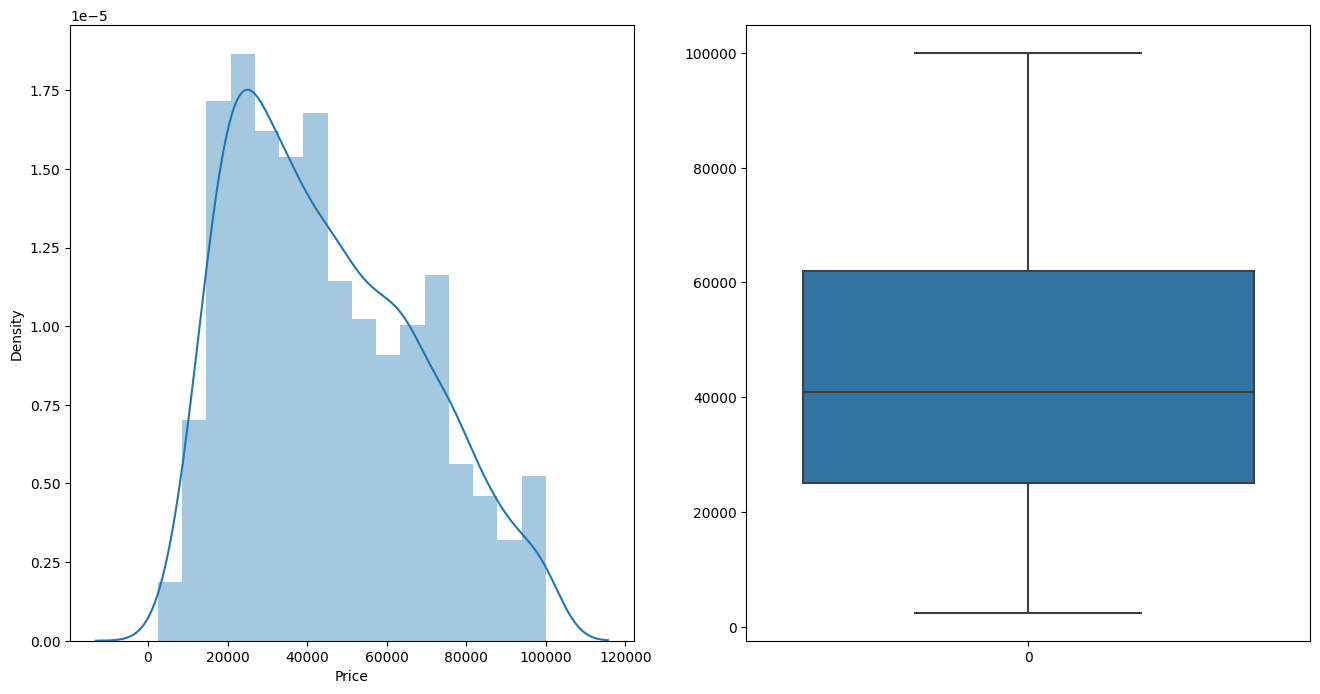

In [40]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df1['Price'])

plt.subplot(1,2,2)
sns.boxplot(df1['Price'])

plt.show()

#### Removing Outliers

In [41]:
df1.boxplot()

<Axes: >

In [42]:
sns.heatmap(df1.select_dtypes(np.number))

<Axes: >

## Step 5: Standardization and Encoding

In [43]:
df1.head()

,index,Title,Location,Address,Area Type,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Availability,Images,City
0,0,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",Carpet Area,33000.0,515,2,2,0.0,19.215537,72.962710,1,['https://static.99acres.com/universalapp/img/...,Thane
1,1,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",Carpet Area,25000.0,771,2,2,4.2,19.294529,72.889927,1,['https://static.99acres.com/universalapp/img/...,Thane
2,3,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",Carpet Area,30000.0,1120,3,2,0.0,28.503846,77.183032,1,['https://static.99acres.com/universalapp/img/...,South Delhi
3,4,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,Super Built-up Area,16000.0,1115,3,2,0.0,28.467073,77.513765,1,['https://static.99acres.com/universalapp/img/...,Noida
4,5,Eldeco Utopia,3 BHK Flat for rent in Sector 93 A Noida,Sector 93 A Noida,Carpet Area,60000.0,1745,3,3,3.9,28.522951,77.386117,1,['https://static.99acres.com/universalapp/img/...,Noida


In [44]:
df1.set_index('index', inplace=True)
df1

,Title,Location,Address,Area Type,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Availability,Images,City
index,,,,,,,,,,,,,,
0,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",Carpet Area,33000.0,515,2,2,0.0,19.215537,72.962710,1,['https://static.99acres.com/universalapp/img/...,Thane
1,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",Carpet Area,25000.0,771,2,2,4.2,19.294529,72.889927,1,['https://static.99acres.com/universalapp/img/...,Thane
3,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",Carpet Area,30000.0,1120,3,2,0.0,28.503846,77.183032,1,['https://static.99acres.com/universalapp/img/...,South Delhi
4,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,Super Built-up Area,16000.0,1115,3,2,0.0,28.467073,77.513765,1,['https://static.99acres.com/universalapp/img/...,Noida
5,Eldeco Utopia,3 BHK Flat for rent in Sector 93 A Noida,Sector 93 A Noida,Carpet Area,60000.0,1745,3,3,3.9,28.522951,77.386117,1,['https://static.99acres.com/universalapp/img/...,Noida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,Vatika India Next,3 BHK Independent Builder Floor for rent in Se...,Sector 82 Gurgaon,Carpet Area,30000.0,1620,3,3,4.1,28.393108,76.958876,1,['https://static.99acres.com/universalapp/img/...,Gurgaon
2471,Indosam75,3 BHK Flat for rent in Sector 75 Noida,Sector 75 Noida,Super Built-up Area,35000.0,1513,3,3,3.8,28.557736,77.323458,1,['https://static.99acres.com/universalapp/img/...,Noida
2472,Paramount Golfforeste,Studio Apartments / 1 RK Flats for rent in Sec...,Sector ZETA Greater Noida,Carpet Area,16000.0,435,1,1,4.2,28.570633,77.327215,1,['https://static.99acres.com/universalapp/img/...,Noida


In [45]:
df1_cat = df1.select_dtypes(exclude=np.number)
df1_num = df1.select_dtypes(np.number)

In [46]:
df1_cat.head()

,Title,Location,Address,Area Type,Availability,Images,City
index,,,,,,,
0,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Thane
1,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Thane
3,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",Carpet Area,1,['https://static.99acres.com/universalapp/img/...,South Delhi
4,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,Super Built-up Area,1,['https://static.99acres.com/universalapp/img/...,Noida
5,Eldeco Utopia,3 BHK Flat for rent in Sector 93 A Noida,Sector 93 A Noida,Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Noida


In [47]:
df1_num.head()

,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude
index,,,,,,,
0,33000.0,515,2,2,0.0,19.215537,72.962710
1,25000.0,771,2,2,4.2,19.294529,72.889927
3,30000.0,1120,3,2,0.0,28.503846,77.183032
4,16000.0,1115,3,2,0.0,28.467073,77.513765
5,60000.0,1745,3,3,3.9,28.522951,77.386117


In [48]:
scaler = StandardScaler()
scaler_num = scaler.fit_transform(df1_num)
scaler_num

array([[-0.51697629, -0.61594527, -0.69104966, ..., -0.79606152,
        -0.9210462 , -1.35347516],
       [-0.8614373 , -0.4701736 , -0.69104966, ...,  1.35993599,
        -0.90685699, -1.38148097],
       [-0.64614917, -0.27144582,  0.49992274, ..., -0.79606152,
         0.74740713,  0.27043026],
       ...,
       [-1.24895594, -0.66149891, -1.88202205, ...,  1.35993599,
         0.75940409,  0.32590922],
       [-0.94755256, -0.56128089, -0.69104966, ..., -0.79606152,
         0.72713868,  0.19616431],
       [ 0.86086774,  0.6282387 ,  1.69089513, ..., -0.79606152,
         0.73481798,  0.2337702 ]])

In [49]:
df1_num = pd.DataFrame(scaler_num, columns=df1_num.columns, index=df1_num.index)
df1_num

,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude
index,,,,,,,
0,-0.516976,-0.615945,-0.691050,-0.632512,-0.796062,-0.921046,-1.353475
1,-0.861437,-0.470174,-0.691050,-0.632512,1.359936,-0.906857,-1.381481
3,-0.646149,-0.271446,0.499923,-0.632512,-0.796062,0.747407,0.270430
4,-1.248956,-0.274293,0.499923,-0.632512,-0.796062,0.740802,0.397690
5,0.645580,0.084442,0.499923,0.379854,1.205936,0.750839,0.348574
...,...,...,...,...,...,...,...
2469,-0.646149,0.013264,0.499923,0.379854,1.308603,0.727515,0.184179
2471,-0.430861,-0.047664,0.499923,0.379854,1.154603,0.757087,0.324464
2472,-1.248956,-0.661499,-1.882022,-1.644878,1.359936,0.759404,0.325909


In [50]:
scaled_df1 = pd.concat([df1_num, df1_cat], axis=1)
scaled_df1.head(5)

,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Title,Location,Address,Area Type,Availability,Images,City
index,,,,,,,,,,,,,,
0,-0.516976,-0.615945,-0.691050,-0.632512,-0.796062,-0.921046,-1.353475,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Thane
1,-0.861437,-0.470174,-0.691050,-0.632512,1.359936,-0.906857,-1.381481,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Thane
3,-0.646149,-0.271446,0.499923,-0.632512,-0.796062,0.747407,0.270430,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",Carpet Area,1,['https://static.99acres.com/universalapp/img/...,South Delhi
4,-1.248956,-0.274293,0.499923,-0.632512,-0.796062,0.740802,0.397690,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,Super Built-up Area,1,['https://static.99acres.com/universalapp/img/...,Noida
5,0.645580,0.084442,0.499923,0.379854,1.205936,0.750839,0.348574,Eldeco Utopia,3 BHK Flat for rent in Sector 93 A Noida,Sector 93 A Noida,Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Noida


In [51]:
scaled_df1.tail()

,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Title,Location,Address,Area Type,Availability,Images,City
index,,,,,,,,,,,,,,
2469,-0.646149,0.013264,0.499923,0.379854,1.308603,0.727515,0.184179,Vatika India Next,3 BHK Independent Builder Floor for rent in Se...,Sector 82 Gurgaon,Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Gurgaon
2471,-0.430861,-0.047664,0.499923,0.379854,1.154603,0.757087,0.324464,Indosam75,3 BHK Flat for rent in Sector 75 Noida,Sector 75 Noida,Super Built-up Area,1,['https://static.99acres.com/universalapp/img/...,Noida
2472,-1.248956,-0.661499,-1.882022,-1.644878,1.359936,0.759404,0.325909,Paramount Golfforeste,Studio Apartments / 1 RK Flats for rent in Sec...,Sector ZETA Greater Noida,Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Noida
2474,-0.947553,-0.561281,-0.691050,-0.632512,-0.796062,0.727139,0.196164,Suncity Avenue 76,2 BHK Flat for rent in Sector 76 Gurgaon,Sector 76 Gurgaon,Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Gurgaon
2475,0.860868,0.628239,1.690895,1.392220,-0.796062,0.734818,0.233770,The New Greenwood CGHS,"4 BHK Flat for rent in Wazirabad, Gurgaon","Wazirabad, Gurgaon",Super Built-up Area,1,['https://static.99acres.com/universalapp/img/...,Gurgaon


#### Encoding

In [52]:
scaled_df1.select_dtypes(object)

,Title,Location,Address,Area Type,Availability,Images,City
index,,,,,,,
0,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Thane
1,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Thane
3,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",Carpet Area,1,['https://static.99acres.com/universalapp/img/...,South Delhi
4,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,Super Built-up Area,1,['https://static.99acres.com/universalapp/img/...,Noida
5,Eldeco Utopia,3 BHK Flat for rent in Sector 93 A Noida,Sector 93 A Noida,Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Noida
...,...,...,...,...,...,...,...
2469,Vatika India Next,3 BHK Independent Builder Floor for rent in Se...,Sector 82 Gurgaon,Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Gurgaon
2471,Indosam75,3 BHK Flat for rent in Sector 75 Noida,Sector 75 Noida,Super Built-up Area,1,['https://static.99acres.com/universalapp/img/...,Noida
2472,Paramount Golfforeste,Studio Apartments / 1 RK Flats for rent in Sec...,Sector ZETA Greater Noida,Carpet Area,1,['https://static.99acres.com/universalapp/img/...,Noida


In [53]:
scaled_df1['Area Type'].value_counts()

Area Type
Super Built-up Area    910
Carpet Area            633
Plot Area              116
Built-up Area           92
Name: count, dtype: int64

In [54]:
scaled_df1['City'].value_counts()

City
Gurgaon        604
Noida          162
Thane          121
Mumbai         115
South Delhi    102
              ... 
Kasargod         1
Karaikudi        1
Ernakulam        1
Patiala          1
Jabalpur         1
Name: count, Length: 104, dtype: int64

In [55]:
df1_encode = pd.get_dummies(df1, columns=['Area Type', 'City'])
df1_encode.head()

,Title,Location,Address,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,...,City_Tirupur,City_Trichy,City_Trivandrum,City_Tumkur,City_Vadodara,City_Varanasi,City_Vijayawada,City_Visakhapatnam,City_West Delhi,City_thanjavur
index,,,,,,,,,,,,,,,,,,,,,
0,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",33000.0,515,2,2,0.0,19.215537,72.962710,...,False,False,False,False,False,False,False,False,False,False
1,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",25000.0,771,2,2,4.2,19.294529,72.889927,...,False,False,False,False,False,False,False,False,False,False
3,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",30000.0,1120,3,2,0.0,28.503846,77.183032,...,False,False,False,False,False,False,False,False,False,False
4,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,16000.0,1115,3,2,0.0,28.467073,77.513765,...,False,False,False,False,False,False,False,False,False,False
5,Eldeco Utopia,3 BHK Flat for rent in Sector 93 A Noida,Sector 93 A Noida,60000.0,1745,3,3,3.9,28.522951,77.386117,...,False,False,False,False,False,False,False,False,False,False


In [56]:
scaled_df1_encode = pd.get_dummies(scaled_df1, columns=['Area Type', 'City'])
scaled_df1_encode.head()

,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Title,Location,Address,...,City_Tirupur,City_Trichy,City_Trivandrum,City_Tumkur,City_Vadodara,City_Varanasi,City_Vijayawada,City_Visakhapatnam,City_West Delhi,City_thanjavur
index,,,,,,,,,,,,,,,,,,,,,
0,-0.516976,-0.615945,-0.691050,-0.632512,-0.796062,-0.921046,-1.353475,Raymond Realty Phase 2,"2 BHK Flat for rent in Vartak Nagar, Thane","Vartak Nagar, Thane",...,False,False,False,False,False,False,False,False,False,False
1,-0.861437,-0.470174,-0.691050,-0.632512,1.359936,-0.906857,-1.381481,Lodha Splendora,"2 BHK Flat for rent in Ghodbunder Road, Thane","Ghodbunder Road, Thane",...,False,False,False,False,False,False,False,False,False,False
3,-0.646149,-0.271446,0.499923,-0.632512,-0.796062,0.747407,0.270430,"Chattarpur, South Delhi",3 BHK Independent Builder Floor for rent in Ch...,"Chattarpur, South Delhi",...,False,False,False,False,False,False,False,False,False,False
4,-1.248956,-0.274293,0.499923,-0.632512,-0.796062,0.740802,0.397690,Amrapali Golf Homes,3 BHK Flat for rent in Sector 4 Greater Noida,Sector 4 Greater Noida,...,False,False,False,False,False,False,False,False,False,False
5,0.645580,0.084442,0.499923,0.379854,1.205936,0.750839,0.348574,Eldeco Utopia,3 BHK Flat for rent in Sector 93 A Noida,Sector 93 A Noida,...,False,False,False,False,False,False,False,False,False,False


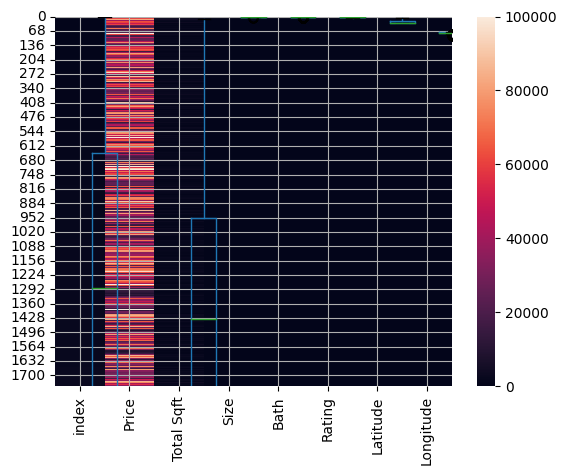

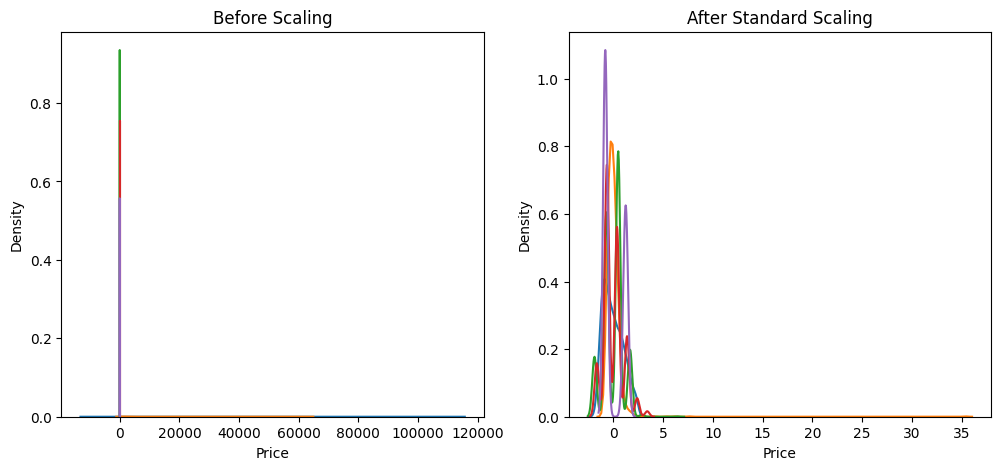

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(df1_encode['Price'], ax=ax1)
sns.kdeplot(df1_encode['Total Sqft'], ax=ax1)
sns.kdeplot(df1_encode['Size'], ax=ax1)
sns.kdeplot(df1_encode['Bath'], ax=ax1)
sns.kdeplot(df1_encode['Rating'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(scaled_df1_encode['Price'], ax=ax2)
sns.kdeplot(scaled_df1_encode['Total Sqft'], ax=ax2)
sns.kdeplot(scaled_df1_encode['Size'], ax=ax2)
sns.kdeplot(scaled_df1_encode['Bath'], ax=ax2)
sns.kdeplot(scaled_df1_encode['Rating'], ax=ax2)
plt.show()

#### Feature Extraction for Clustering

In [58]:
X = scaled_df1_encode.drop(columns=['Title', 'Location', 'Address', 'Rating','Images'])

In [59]:
X.head()

,Price,Total Sqft,Size,Bath,Latitude,Longitude,Availability,Area Type_Built-up Area,Area Type_Carpet Area,Area Type_Plot Area,...,City_Tirupur,City_Trichy,City_Trivandrum,City_Tumkur,City_Vadodara,City_Varanasi,City_Vijayawada,City_Visakhapatnam,City_West Delhi,City_thanjavur
index,,,,,,,,,,,,,,,,,,,,,
0,-0.516976,-0.615945,-0.691050,-0.632512,-0.921046,-1.353475,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.861437,-0.470174,-0.691050,-0.632512,-0.906857,-1.381481,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.646149,-0.271446,0.499923,-0.632512,0.747407,0.270430,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.248956,-0.274293,0.499923,-0.632512,0.740802,0.397690,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0.645580,0.084442,0.499923,0.379854,0.750839,0.348574,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## Step 6: Clustering for House Recommendation

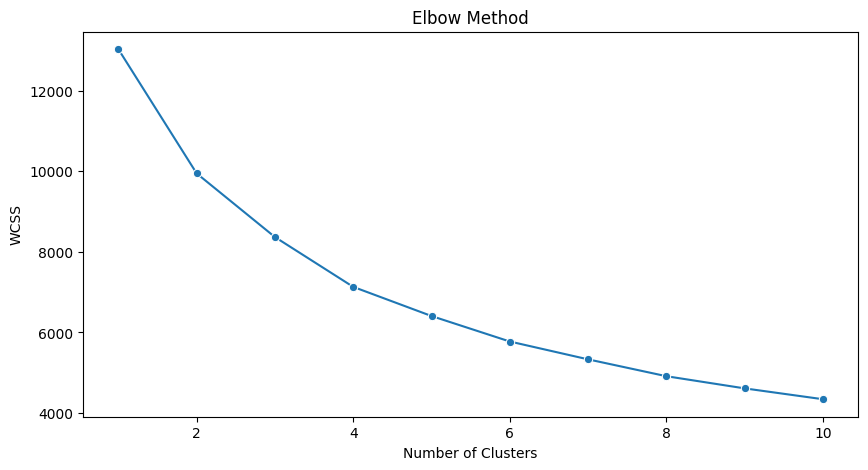

In [60]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)
df1['Cluster'] = clusters
X['Cluster'] = clusters

## Step 7: House Recommendation System Using Nearest Neighbors

# Nearest Neighbors

In [61]:
# Fit the Nearest Neighbors model
nn_model = NearestNeighbors(metric='euclidean')
nn_model.fit(X)

NearestNeighbors(metric='euclidean')

In [62]:
def recommend_similar_houses_try(query_house_index, num_recommendations=5):
    distances, indices = nn_model.kneighbors(X.iloc[[df1.index.get_loc(query_house_index)]].values.reshape(1, -1),\
                                             n_neighbors=num_recommendations+1)
    recommended_indices = indices.squeeze()[1:]
    interested_house  =  df1.iloc[[df1.index.get_loc(query_house_index)]].dropna(axis=1)
    recommended_houses = df1.iloc[recommended_indices]

    return interested_house, recommended_houses

In [63]:
query_house_index = 183  # Index of the query house in the dataframe
interested_house, recommended_houses = recommend_similar_houses_try(query_house_index)

In [64]:
interested_house

,Title,Location,Address,Area Type,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Availability,Images,City,Cluster
index,,,,,,,,,,,,,,,
183,Lodha Upper Thane,"1 BHK Flat for rent in Anjurdive, Thane","Anjurdive, Thane",Carpet Area,11000.0,457,1,2,3.8,19.194329,72.970178,1,['https://static.99acres.com/universalapp/img/...,Thane,3


In [65]:
recommended_houses

,Title,Location,Address,Area Type,Price,Total Sqft,Size,Bath,Rating,Latitude,Longitude,Availability,Images,City,Cluster
index,,,,,,,,,,,,,,,
288,Lodha Upper Thane,"1 BHK Flat for rent in Anjurdive, Thane","Anjurdive, Thane",Carpet Area,10700.0,457,1,2,3.8,19.194329,72.970178,1,['https://static.99acres.com/universalapp/img/...,Thane,3
1145,Siddhi Highland Springs,"1 BHK Flat for rent in Dhokali, Thane","Dhokali, Thane",Carpet Area,24000.0,420,1,2,0.0,19.225579,72.984544,1,['https://static.99acres.com/universalapp/img/...,Thane,3
1132,Siddhi Highland Springs,"1 BHK Flat for rent in Dhokali, Thane","Dhokali, Thane",Carpet Area,24000.0,404,1,2,0.0,19.225579,72.984544,1,['https://static.99acres.com/universalapp/img/...,Thane,3
1932,Jeevan Legacy Enclave,"1 BHK Flat for rent in Charai, Thane","Charai, Thane",Carpet Area,26000.0,470,1,2,0.0,19.197570,72.975279,1,['https://static.99acres.com/universalapp/img/...,Thane,3
2298,Hiranandani The Walk,"1 BHK Flat for rent in Hiranandani Estate, Thane","Hiranandani Estate, Thane",Carpet Area,26000.0,420,1,2,4.2,19.257009,72.983926,1,['https://static.99acres.com/universalapp/img/...,Thane,3


### Saving the model

In [66]:
import pickle

In [67]:
pickle.dump(df1, open('df1.pkl', 'wb'))
pickle.dump(nn_model, open('nn_model.pkl', 'wb'))
pickle.dump(X, open('X.pkl', 'wb'))